In [2]:
# Load necessary libraries
library(dplyr)
library(tidyverse)
library(ggplot2) # Ensure ggplot2 is loaded explicitly

# Load the dataset
df <- read.csv("wellbeing_isolation_professional_dataset.csv")

# Quick look at the data structure
head(df)
str(df)

,Work_Location,Age,Experience_Years,Work_Hours_Per_Week,Salary,Sleep_Hours,Social_Interactions,Productivity,Isolation_Score,WellBeing_Score,Stress_Level
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Remote,47,15.9,44.8,12353,6.3,3.6,67.2,7.82,3.13,High
2,Office,36,13.1,43.6,9309,9.0,0.1,67.4,2.69,3.40,High
3,Hybrid,30,7.1,50.2,8772,7.0,0.0,52.6,4.03,2.33,High
4,Remote,40,15.8,46.7,12067,6.6,5.5,78.7,8.46,2.07,High
5,Remote,35,12.8,37.0,10399,6.9,5.7,75.7,5.17,1.99,High
6,Office,45,15.5,51.8,11199,5.0,8.4,71.0,3.96,2.88,High


'data.frame':	3500 obs. of  11 variables:
 $ Work_Location      : chr  "Remote" "Office" "Hybrid" "Remote" ...
 $ Age                : int  47 36 30 40 35 45 35 34 32 36 ...
 $ Experience_Years   : num  15.9 13.1 7.1 15.8 12.8 15.5 13.3 8.6 9.9 12 ...
 $ Work_Hours_Per_Week: num  44.8 43.6 50.2 46.7 37 51.8 47 43.9 39.5 41 ...
 $ Salary             : int  12353 9309 8772 12067 10399 11199 9338 8884 9889 10329 ...
 $ Sleep_Hours        : num  6.3 9 7 6.6 6.9 5 5 6.2 8.1 6 ...
 $ Social_Interactions: num  3.6 0.1 0 5.5 5.7 8.4 6.7 6.1 0.1 4.3 ...
 $ Productivity       : num  67.2 67.4 52.6 78.7 75.7 71 59.2 48.9 65.7 68.6 ...
 $ Isolation_Score    : num  7.82 2.69 4.03 8.46 5.17 3.96 3.09 6 6.55 7.06 ...
 $ WellBeing_Score    : num  3.13 3.4 2.33 2.07 1.99 2.88 4.21 3.92 2.75 2.32 ...
 $ Stress_Level       : chr  "High" "High" "High" "High" ...


### 1. Descriptive Statistics & Distribution
First, let's explore the distribution of the **Isolation Score**. We calculate the Mean and Median, and visualize the distribution to see if it follows a normal curve.

--------------------------------------
Descriptive Statistics for Isolation Score:
--------------------------------------
Mean   :  4.95 
Median :  4.72 
--------------------------------------


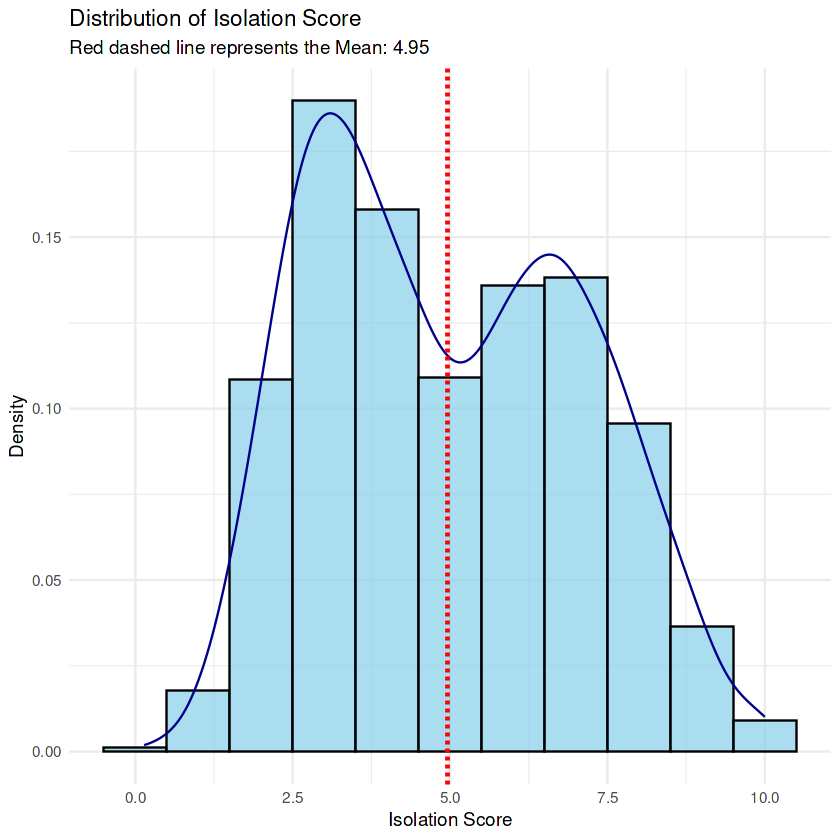

In [4]:
# Calculate Mean and Median
meanP <- mean(df$Isolation_Score)
medianP <- median(df$Isolation_Score) 

# Print Results with formatting
cat("--------------------------------------\n")
cat("Descriptive Statistics for Isolation Score:\n")
cat("--------------------------------------\n")
cat("Mean   : ", round(meanP, 2), "\n")
cat("Median : ", round(medianP, 2), "\n")
cat("--------------------------------------\n")

# Visualization: Histogram with Density Curve (using ggplot2)
ggplot(df, aes(x = Isolation_Score)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(color = "darkblue") +
  geom_vline(aes(xintercept = meanP), color = "red", linetype = "dashed", size = 1) +
  labs(
    title = "Distribution of Isolation Score",
    subtitle = paste("Red dashed line represents the Mean:", round(meanP, 2)),
    x = "Isolation Score",
    y = "Density"
  ) +
  theme_minimal()

### 2. Group Analysis by Work Location
Here we analyze how isolation scores differ based on the work location (Remote, Hybrid, Office).

Work_Location,Count,Mean_Isolation,Median_Isolation,VAR_Isolation,SD_Isolation,Min,Max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hybrid,713,4.17,4.16,1.03,1.01,0.74,7.09
Office,1164,2.82,2.81,0.69,0.83,0.14,5.91
Remote,1623,6.83,6.81,1.65,1.29,2.74,10.00


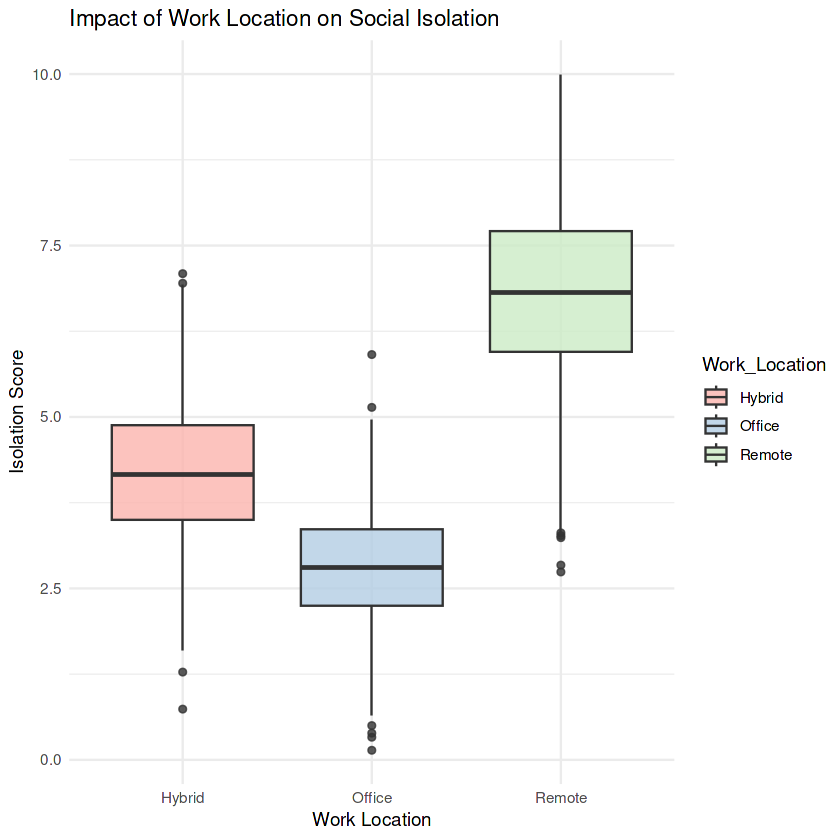

In [7]:
# Grouping and Summarizing
group_summary <- df %>%
    group_by(Work_Location) %>%
    summarise(
        Count = n(),
        Mean_Isolation = round(mean(Isolation_Score), 2),
        Median_Isolation = median(Isolation_Score),
        VAR_Isolation = round(var(Isolation_Score), 2),
        SD_Isolation = round(sd(Isolation_Score), 2),
        Min = min(Isolation_Score),
        Max = max(Isolation_Score)
    )

# Print the table
group_summary

# Visualization: Boxplot by Work Location
ggplot(df, aes(x = Work_Location, y = Isolation_Score, fill = Work_Location)) +
  geom_boxplot(alpha = 0.8) +
  labs(
    title = "Impact of Work Location on Social Isolation",
    x = "Work Location",
    y = "Isolation Score"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Pastel1")

### 3. Probability Calculations (Z-Score)
**Scenario:** Assuming the population mean is 6.83 and SD is 1.29 (from Remote workers stats).
**Question:** What is the probability that a *single randomly selected* remote worker has an isolation score less than 6.5?

In [8]:
# Probability Calculation
pop_mean <- 6.83    
pop_sd <- 1.29      
n <- 1              # Sample size = 1 (Single individual selection)
target_score <- 6.5
se <- pop_sd / sqrt(n)

# Calculate Probability P(X < 6.5)
prob <- pnorm(target_score, mean = pop_mean, sd = se, lower.tail = TRUE)

cat("--------------------------------------\n")
cat("Probability Calculation (Z-Score)\n")
cat("--------------------------------------\n")
cat("Target Score : <", target_score, "\n")
cat("Probability  : ", round(prob, 4), " (", round(prob * 100, 2), "% )\n")
cat("--------------------------------------\n")

--------------------------------------
Probability Calculation (Z-Score)
--------------------------------------
Target Score : < 6.5 
Probability  :  0.399  ( 39.9 % )
--------------------------------------


### 4. Sampling Distributions (Hypothesis Testing)
We will perform two tests:
1.  **Difference between Means:** Probability that Remote workers' mean score is higher than Office workers by at least 4 points (Sample n=30).
2.  **Difference between Proportions:** Probability that Remote workers have a higher "High Stress" proportion than Office workers by 5% (Sample n=100).

In [9]:
# 1. SAMPLING DISTRIBUTION OF DIFFERENCE BETWEEN TWO MEANS
mu_remote <- mean(df$Isolation_Score[df$Work_Location == "Remote"])
sd_remote <- sd(df$Isolation_Score[df$Work_Location == "Remote"])
mu_office <- mean(df$Isolation_Score[df$Work_Location == "Office"])
sd_office <- sd(df$Isolation_Score[df$Work_Location == "Office"])

n_sample <- 30
margin_score <- 4

mu_diff <- mu_remote - mu_office
se_diff <- sqrt((sd_remote^2 / n_sample) + (sd_office^2 / n_sample))
z_score_mean <- (margin_score - mu_diff) / se_diff
prob_mean <- 1 - pnorm(z_score_mean)

# 2. SAMPLING DISTRIBUTION OF DIFFERENCE BETWEEN TWO PROPORTIONS
p_remote <- mean(df$Stress_Level[df$Work_Location == "Remote"] == "High")
p_office <- mean(df$Stress_Level[df$Work_Location == "Office"] == "High")

n_prop <- 100
margin_prop <- 0.05

p_diff_val <- p_remote - p_office
se_prop <- sqrt((p_remote * (1 - p_remote) / n_prop) + (p_office * (1 - p_office) / n_prop))
z_score_p <- (margin_prop - p_diff_val) / se_prop
prob_p <- 1 - pnorm(z_score_p)

# Print Results
cat("===============================================================\n")
cat(" SAMPLING DISTRIBUTION RESULTS\n")
cat("===============================================================\n")
cat("1. Difference in Means (Remote > Office by 4 points):\n")
cat("   - Probability: ", round(prob_mean, 4), "\n\n")
cat("2. Difference in Proportions (Remote > Office by 5% Stress):\n")
cat("   - Probability: ", round(prob_p, 4), "\n")
cat("===============================================================\n")

 SAMPLING DISTRIBUTION RESULTS
1. Difference in Means (Remote > Office by 4 points):
   - Probability:  0.5173 

2. Difference in Proportions (Remote > Office by 5% Stress):
   - Probability:  0.9439 


### 5. Correlation Analysis
We analyze the relationship between **Social Interactions** and **Well-Being Score**.

--------------------------------------
Correlation Analysis:
--------------------------------------
Pearson Correlation (r) :  0.541 
R-Squared (Determination):  0.2927 
Conclusion: Moderate Positive Correlation.
--------------------------------------


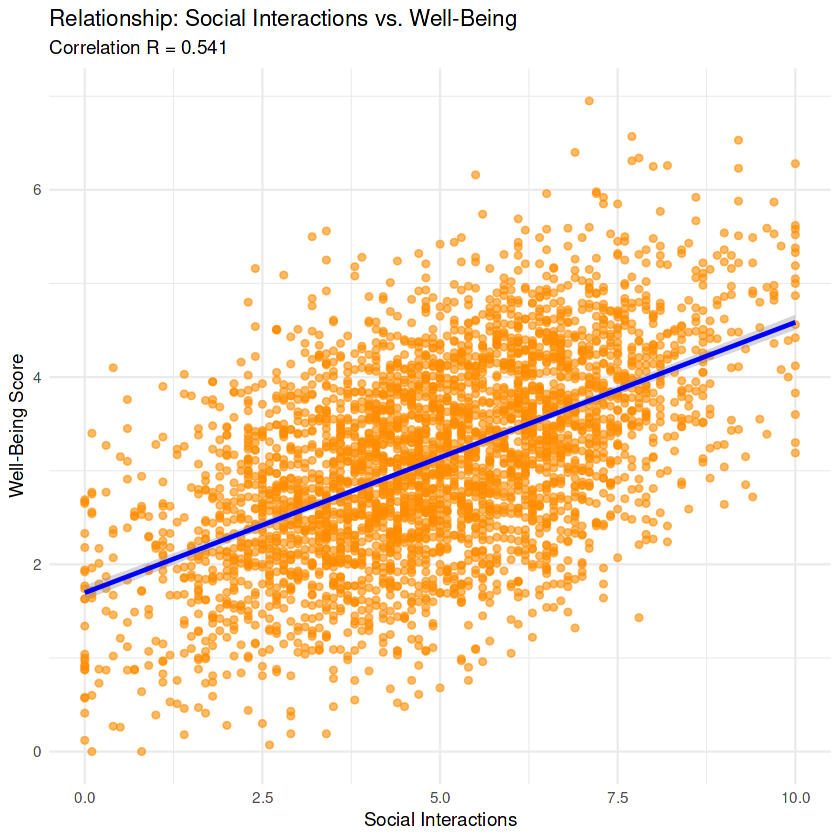

In [15]:
# Calculate Pearson Correlation
r_sw <- cor(df$Social_Interactions, df$WellBeing_Score, method = "pearson")
r2_sw <- r_sw^2

# Print Correlation stats
cat("--------------------------------------\n")
cat("Correlation Analysis:\n")
cat("--------------------------------------\n")
cat("Pearson Correlation (r) : ", round(r_sw, 4), "\n")
cat("R-Squared (Determination): ", round(r2_sw, 4), "\n")
cat("Conclusion: Moderate Positive Correlation.\n")
cat("--------------------------------------\n")

# Visualization: Scatter Plot with Regression Line (ggplot2)
ggplot(df, aes(x = Social_Interactions, y = WellBeing_Score)) +
  geom_point(color = "darkorange", alpha = 0.6) +
  geom_smooth(method = "lm", color = "blue", se = TRUE, formula = y ~ x) +
  labs(
    title = "Relationship: Social Interactions vs. Well-Being",
    subtitle = paste("Correlation R =", round(r_sw, 3)),
    x = "Social Interactions",
    y = "Well-Being Score"
  ) +
  theme_minimal()

### 6. Linear Regression & Prediction
We build a linear model to predict **Well-Being Score** based on **Social Interactions**.
**Task:** Predict Well-Being score for someone with **10** social interactions.

In [16]:
# Fit Linear Model
model <- lm(WellBeing_Score ~ Social_Interactions, data = df)

# Get Coefficients
beta0 <- coef(model)[1]  
beta1 <- coef(model)[2]

# Prediction for x = 10
x_new <- 10
y_pred <- beta0 + (beta1 * x_new)

cat("--------------------------------------\n")
cat("Linear Regression Prediction\n")
cat("--------------------------------------\n")
cat("Equation: Y =", round(beta0, 2), "+", round(beta1, 2), "* X\n")
cat("For Social Interactions =", x_new, "\n")
cat("Predicted Well-Being Score =", round(y_pred, 2), "\n")
cat("--------------------------------------\n")

--------------------------------------
Linear Regression Prediction
--------------------------------------
Equation: Y = 1.7 + 0.29 * X
For Social Interactions = 10 
Predicted Well-Being Score = 4.59 
--------------------------------------


### 7. Bayes' Theorem Application
**Objective:** Calculate the probability that an employee is working **Remotely** given that they have **High Stress**.
$$P(\text{Location} | \text{Stress}) = \frac{P(\text{Stress} | \text{Location}) \cdot P(\text{Location})}{P(\text{Stress})}$$


             Bayes Rule Result
 P(Remote)           : 0.4637 
 P(High Stress)      : 0.9086 
 P(Stress | Remote)  : 0.96 
------------------------------------
 POSTERIOR PROBABILITY:
 P(Remote | Stress)  : 0.4899 


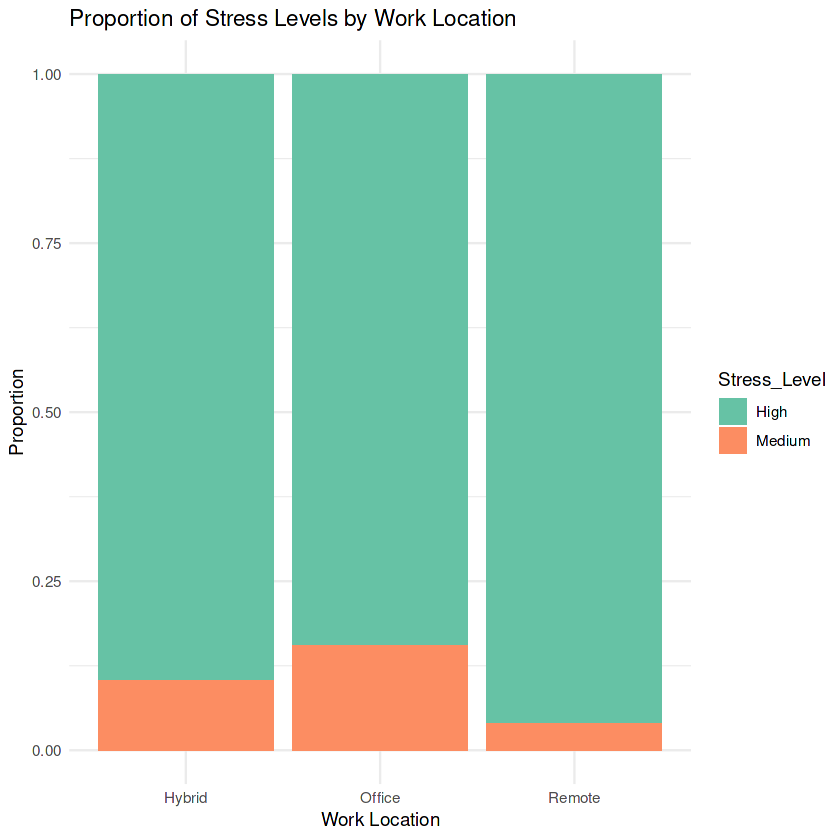

In [17]:
# Calculate Probabilities
p_location <- mean(df$Work_Location == "Remote")
p_stress <- mean(df$Stress_Level == "High")

# P(Stress | Location = Remote)
p_stress_given_location <- df %>%
  filter(Work_Location == "Remote") %>%
  summarise(prob = mean(Stress_Level == "High")) %>%
  pull()

# Apply Bayes Theorem
bayes_result <- (p_stress_given_location * p_location) / p_stress

# Visualization: Stress Levels by Location
ggplot(df, aes(x = Work_Location, fill = Stress_Level)) +
  geom_bar(position = "fill") +
  labs(
    title = "Proportion of Stress Levels by Work Location",
    y = "Proportion",
    x = "Work Location"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

# Print Bayes Result
cat("\n====================================\n")
cat("             Bayes Rule Result\n")
cat("====================================\n")
cat(" P(Remote)           :", round(p_location, 4), "\n")
cat(" P(High Stress)      :", round(p_stress, 4), "\n")
cat(" P(Stress | Remote)  :", round(p_stress_given_location, 4), "\n")
cat("------------------------------------\n")
cat(" POSTERIOR PROBABILITY:\n")
cat(" P(Remote | Stress)  :", round(bayes_result, 4), "\n")
cat("====================================\n")